In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import csv
import math
import gmaps

# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [2]:
path = "Chicago_Crimedata.csv"
path2 = "Seattle_Crime_Stats_by_Police_Precinct_2008-Present.csv"
df = pd.read_csv(path)
#df2 = pd.read_csv(path2)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,1329893,G025358,1/12/2001 17:30,0000X E 100 PL,420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,False,True,...,NaN,NaN,04B,1178432.0,1838311.0,2001,8/17/2015 15:03,41.711629,-87.622141,"(41.711628886, -87.622141173)"
1,1329967,G025724,1/12/2001 19:30,0000X E 100 PL,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,NaN,NaN,5,1178784.0,1838322.0,2001,8/17/2015 15:03,41.711651,-87.620852,"(41.711651086, -87.620851734)"
2,1346230,G047389,1/23/2001 8:00,0000X E 100 PL,820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,NaN,NaN,6,1178566.0,1838395.0,2001,8/17/2015 15:03,41.711856,-87.621648,"(41.711856355, -87.621647891)"
3,1347551,G048475,1/23/2001 20:29,0000X E 100 PL,920,MOTOR VEHICLE THEFT,ATT: AUTOMOBILE,STREET,True,False,...,NaN,NaN,7,1178292.0,1838387.0,2001,8/17/2015 15:03,41.711841,-87.622652,"(41.711840612, -87.622651588)"
4,1377882,G082031,2/8/2001 21:00,0000X E 100 PL,820,THEFT,$500 AND UNDER,STREET,False,False,...,NaN,NaN,6,1178312.0,1838387.0,2001,8/17/2015 15:03,41.711840,-87.622578,"(41.711840159, -87.622578343)"


In [3]:
#df2.columns


In [4]:
#df2[["CRIME_TYPE","CRIME_DESCRIPTION","REPORT_DATE"]].head()

In [5]:
typelist = df["Primary Type"].unique()


In [6]:
dff = pd.DataFrame({
    "ID":df["ID"],
    "Year":df["Year"],
    "Primary Type":df["Primary Type"],
    "Latitude":df["Latitude"],
    "Longitude":df["Longitude"],
    "Location":df["Location"],
    "Date":df["Date"],
    "Location Description":df["Location Description"]
})
dff = dff.dropna(how ="any")
dff.head()


,ID,Year,Primary Type,Latitude,Longitude,Location,Date,Location Description
0,1329893,2001,BATTERY,41.711629,-87.622141,"(41.711628886, -87.622141173)",1/12/2001 17:30,RESIDENCE
1,1329967,2001,BURGLARY,41.711651,-87.620852,"(41.711651086, -87.620851734)",1/12/2001 19:30,RESIDENCE
2,1346230,2001,THEFT,41.711856,-87.621648,"(41.711856355, -87.621647891)",1/23/2001 8:00,RESIDENCE
3,1347551,2001,MOTOR VEHICLE THEFT,41.711841,-87.622652,"(41.711840612, -87.622651588)",1/23/2001 20:29,STREET
4,1377882,2001,THEFT,41.711840,-87.622578,"(41.711840159, -87.622578343)",2/8/2001 21:00,STREET


In [7]:
dff.Location

0          (41.711628886, -87.622141173)
1          (41.711651086, -87.620851734)
2          (41.711856355, -87.621647891)
3          (41.711840612, -87.622651588)
4          (41.711840159, -87.622578343)
5          (41.711846171, -87.622219353)
6          (41.711638616, -87.621496469)
7          (41.711646483, -87.620994622)
8          (41.711646483, -87.620994622)
9          (41.711622874, -87.622500162)
10          (41.71163306, -87.621928703)
11         (41.711844764, -87.622435455)
12         (41.711856355, -87.621647891)
13          (41.71183689, -87.622937304)
14         (41.711634466, -87.621712601)
15         (41.711646483, -87.620994622)
16         (41.711648796, -87.620925009)
17         (41.711648796, -87.620925009)
18         (41.711864223, -87.621146043)
19         (41.711854496, -87.621790749)
20         (41.711860051, -87.621358514)
21         (41.711648796, -87.620925009)
22         (41.711838752, -87.622794446)
23         (41.711852636, -87.621933607)
24         (41.7

In [8]:
typelist = list(dff["Primary Type"].unique())
yearlist = list(range(2001,2020))
#yearlist

        

In [9]:
x = 2
theft_data = [len(data2001crime[x]),len(data2002crime[x]),len(data2003crime[x]),len(data2004crime[x]),len(data2005crime[x]),len(data2006crime[x]),len(data2007crime[x]),len(data2008crime[x]),len(data2009crime[x]),len(data2010crime[x]),len(data2011crime[x]),len(data2012crime[x]),len(data2013crime[x]),len(data2014crime[x]),len(data2015crime[x]),len(data2016crime[x]),len(data2017crime[x]),len(data2018crime[x])]



plt.plot(list(range(2001,2019)), theft_data)

#plt.title("Tempature vs Latitude")
#plt.xlabel("Latitude")
#plt.ylabel("Tempature")






NameError: name 'data2001crime' is not defined

In [10]:
len(data2001crime[2])

NameError: name 'data2001crime' is not defined

In [11]:
years_data = []
both_data = []
data2001 = dff.loc[dff["Year"]==2001,:]
data2002 = dff.loc[dff["Year"]==2002,:]
data2003 = dff.loc[dff["Year"]==2003,:]
data2004 = dff.loc[dff["Year"]==2004,:]
data2005 = dff.loc[dff["Year"]==2005,:]
data2006 = dff.loc[dff["Year"]==2006,:]
data2007 = dff.loc[dff["Year"]==2007,:]
data2008 = dff.loc[dff["Year"]==2008,:]
data2009 = dff.loc[dff["Year"]==2009,:]
data2010 = dff.loc[dff["Year"]==2010,:]
data2011 = dff.loc[dff["Year"]==2011,:]
data2012 = dff.loc[dff["Year"]==2012,:]
data2013 = dff.loc[dff["Year"]==2013,:]
data2014 =dff.loc[dff["Year"]==2014,:]
data2015 = dff.loc[dff["Year"]==2015,:]
data2016 = dff.loc[dff["Year"]==2016,:]
data2017 = dff.loc[dff["Year"]==2017,:]
data2018 = dff.loc[dff["Year"]==2018,:]
data2019 = dff.loc[dff["Year"]==2019,:]


data2001crime = []
data2002crime = []
data2003crime = []
data2004crime = []
data2005crime = []
data2006crime = []
data2007crime = []
data2008crime = []
data2009crime = []
data2010crime = []
data2011crime = []
data2012crime = []
data2013crime = []
data2014crime = []
data2015crime = []
data2016crime = []
data2017crime = []
data2018crime = []
data2019crime = []


for crime in typelist:
    data2001crime.append(data2001.loc[data2001["Primary Type"] == crime,:])
    data2002crime.append(data2002.loc[data2002["Primary Type"] == crime,:])
    data2003crime.append(data2003.loc[data2003["Primary Type"] == crime,:])
    data2004crime.append(data2004.loc[data2004["Primary Type"] == crime,:])
    data2005crime.append(data2005.loc[data2005["Primary Type"] == crime,:])
    data2006crime.append(data2006.loc[data2006["Primary Type"] == crime,:])
    data2007crime.append(data2007.loc[data2007["Primary Type"] == crime,:])
    data2008crime.append(data2008.loc[data2008["Primary Type"] == crime,:])
    data2009crime.append(data2009.loc[data2009["Primary Type"] == crime,:])
    data2010crime.append(data2010.loc[data2010["Primary Type"] == crime,:])
    data2011crime.append(data2011.loc[data2011["Primary Type"] == crime,:])
    data2012crime.append(data2012.loc[data2012["Primary Type"] == crime,:])
    data2013crime.append(data2013.loc[data2013["Primary Type"] == crime,:])
    data2014crime.append(data2014.loc[data2014["Primary Type"] == crime,:])
    data2015crime.append(data2015.loc[data2015["Primary Type"] == crime,:])
    data2016crime.append(data2016.loc[data2016["Primary Type"] == crime,:])
    data2017crime.append(data2017.loc[data2017["Primary Type"] == crime,:])
    data2018crime.append(data2018.loc[data2018["Primary Type"] == crime,:])
    data2019crime.append(data2019.loc[data2019["Primary Type"] == crime,:])
   

In [12]:


data2019.head()
len(data2019)
one_list = []
for xx in list(range(0,len(data2019))):
    one_list.append(1)

In [13]:
locations = data2019.Location
gmaps.configure(api_key=gkey)
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=one_list, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig

ValueError: too many values to unpack (expected 2)

In [14]:
type_data = []
type_list = list(dff["Primary Type"].unique())

for types in type_list:
    type_data.append(dff.loc[dff["Primary Type"] == types,:])


In [15]:
list(type_list)

['BATTERY',
 'BURGLARY',
 'THEFT',
 'MOTOR VEHICLE THEFT',
 'NARCOTICS',
 'OTHER OFFENSE',
 'ASSAULT',
 'CRIMINAL DAMAGE',
 'CRIMINAL TRESPASS',
 'ROBBERY',
 'WEAPONS VIOLATION',
 'GAMBLING',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'OFFENSE INVOLVING CHILDREN',
 'ARSON',
 'CRIM SEXUAL ASSAULT',
 'DECEPTIVE PRACTICE',
 'LIQUOR LAW VIOLATION',
 'PROSTITUTION',
 'SEX OFFENSE',
 'PUBLIC PEACE VIOLATION',
 'STALKING',
 'KIDNAPPING',
 'INTIMIDATION',
 'OBSCENITY',
 'HUMAN TRAFFICKING',
 'HOMICIDE',
 'OTHER NARCOTIC VIOLATION',
 'CONCEALED CARRY LICENSE VIOLATION',
 'NON-CRIMINAL',
 'PUBLIC INDECENCY',
 'RITUALISM',
 'NON - CRIMINAL',
 'NON-CRIMINAL (SUBJECT SPECIFIED)']

In [16]:
len(type_data[0].dropna(how = "any"))

163874

([<matplotlib.axis.XTick at 0x130691cc0>,
 <a list of 9 Text xticklabel objects>)

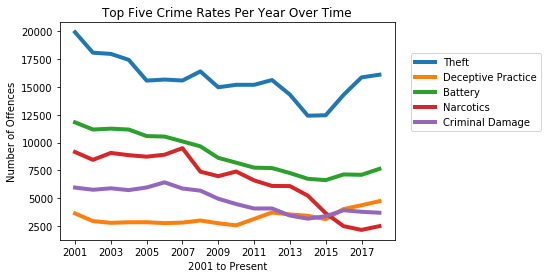

In [17]:
# 2 theft
# 0 battery 
# 4 narcotics
# 7 criminal damage
# 16 deceptive practice 

x = 2
theft_data = [len(data2001crime[x]),len(data2002crime[x]),len(data2003crime[x]),len(data2004crime[x]),len(data2005crime[x]),len(data2006crime[x]),len(data2007crime[x]),len(data2008crime[x]),len(data2009crime[x]),len(data2010crime[x]),len(data2011crime[x]),len(data2012crime[x]),len(data2013crime[x]),len(data2014crime[x]),len(data2015crime[x]),len(data2016crime[x]),len(data2017crime[x]),len(data2018crime[x])]
x = 0
battery_data = [len(data2001crime[x]),len(data2002crime[x]),len(data2003crime[x]),len(data2004crime[x]),len(data2005crime[x]),len(data2006crime[x]),len(data2007crime[x]),len(data2008crime[x]),len(data2009crime[x]),len(data2010crime[x]),len(data2011crime[x]),len(data2012crime[x]),len(data2013crime[x]),len(data2014crime[x]),len(data2015crime[x]),len(data2016crime[x]),len(data2017crime[x]),len(data2018crime[x])]
x = 4
narcotic_data = [len(data2001crime[x]),len(data2002crime[x]),len(data2003crime[x]),len(data2004crime[x]),len(data2005crime[x]),len(data2006crime[x]),len(data2007crime[x]),len(data2008crime[x]),len(data2009crime[x]),len(data2010crime[x]),len(data2011crime[x]),len(data2012crime[x]),len(data2013crime[x]),len(data2014crime[x]),len(data2015crime[x]),len(data2016crime[x]),len(data2017crime[x]),len(data2018crime[x])]
x = 7
damage_data = [len(data2001crime[x]),len(data2002crime[x]),len(data2003crime[x]),len(data2004crime[x]),len(data2005crime[x]),len(data2006crime[x]),len(data2007crime[x]),len(data2008crime[x]),len(data2009crime[x]),len(data2010crime[x]),len(data2011crime[x]),len(data2012crime[x]),len(data2013crime[x]),len(data2014crime[x]),len(data2015crime[x]),len(data2016crime[x]),len(data2017crime[x]),len(data2018crime[x])]
x = 16
deceptive_data = [len(data2001crime[x]),len(data2002crime[x]),len(data2003crime[x]),len(data2004crime[x]),len(data2005crime[x]),len(data2006crime[x]),len(data2007crime[x]),len(data2008crime[x]),len(data2009crime[x]),len(data2010crime[x]),len(data2011crime[x]),len(data2012crime[x]),len(data2013crime[x]),len(data2014crime[x]),len(data2015crime[x]),len(data2016crime[x]),len(data2017crime[x]),len(data2018crime[x])]



plt.plot(list(range(2001,2019)), theft_data, linewidth =4)
plt.plot(list(range(2001,2019)), deceptive_data, linewidth =4)
plt.plot(list(range(2001,2019)), battery_data, linewidth =4)
plt.plot(list(range(2001,2019)), narcotic_data, linewidth =4)
plt.plot(list(range(2001,2019)), damage_data, linewidth =4)
plt.title("Top Five Crime Rates Per Year Over Time")
plt.xlabel("2001 to Present")
plt.ylabel("Number of Offences")
plt.legend(["Theft","Deceptive Practice","Battery","Narcotics","Criminal Damage"] ,loc=(1.05,0.5))
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])




Text(0, 0.5, 'Number of Offences')

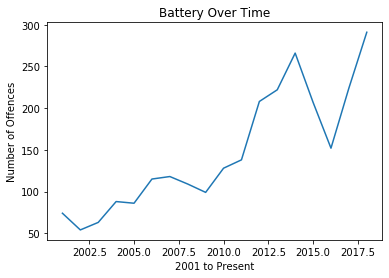

In [18]:
x = 12
theft_data = [len(data2001crime[x]),len(data2002crime[x]),len(data2003crime[x]),len(data2004crime[x]),len(data2005crime[x]),len(data2006crime[x]),len(data2007crime[x]),len(data2008crime[x]),len(data2009crime[x]),len(data2010crime[x]),len(data2011crime[x]),len(data2012crime[x]),len(data2013crime[x]),len(data2014crime[x]),len(data2015crime[x]),len(data2016crime[x]),len(data2017crime[x]),len(data2018crime[x])]



plt.plot(list(range(2001,2019)), theft_data)

plt.title("Battery Over Time")
plt.xlabel("2001 to Present")
plt.ylabel("Number of Offences")




Text(0, 0.5, 'Number of Offences')

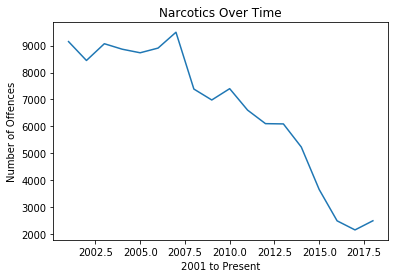

In [19]:
x = 4
theft_data = [len(data2001crime[x]),len(data2002crime[x]),len(data2003crime[x]),len(data2004crime[x]),len(data2005crime[x]),len(data2006crime[x]),len(data2007crime[x]),len(data2008crime[x]),len(data2009crime[x]),len(data2010crime[x]),len(data2011crime[x]),len(data2012crime[x]),len(data2013crime[x]),len(data2014crime[x]),len(data2015crime[x]),len(data2016crime[x]),len(data2017crime[x]),len(data2018crime[x])]

x = 16
deceptive_data = [len(data2001crime[x]),len(data2002crime[x]),len(data2003crime[x]),len(data2004crime[x]),len(data2005crime[x]),len(data2006crime[x]),len(data2007crime[x]),len(data2008crime[x]),len(data2009crime[x]),len(data2010crime[x]),len(data2011crime[x]),len(data2012crime[x]),len(data2013crime[x]),len(data2014crime[x]),len(data2015crime[x]),len(data2016crime[x]),len(data2017crime[x]),len(data2018crime[x])]


plt.plot(list(range(2001,2019)), theft_data)

plt.title("Narcotics Over Time")
plt.xlabel("2001 to Present")
plt.ylabel("Number of Offences")

Text(0, 0.5, 'Number of Offences')

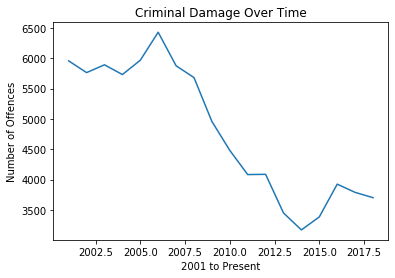

In [20]:
x = 7
theft_data = [len(data2001crime[x]),len(data2002crime[x]),len(data2003crime[x]),len(data2004crime[x]),len(data2005crime[x]),len(data2006crime[x]),len(data2007crime[x]),len(data2008crime[x]),len(data2009crime[x]),len(data2010crime[x]),len(data2011crime[x]),len(data2012crime[x]),len(data2013crime[x]),len(data2014crime[x]),len(data2015crime[x]),len(data2016crime[x]),len(data2017crime[x]),len(data2018crime[x])]



plt.plot(list(range(2001,2019)), theft_data)

plt.title("Criminal Damage Over Time")
plt.xlabel("2001 to Present")
plt.ylabel("Number of Offences")

Text(0, 0.5, 'Number of Offences')

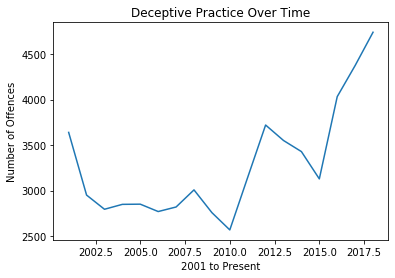

In [21]:
x = 16
theft_data = [len(data2001crime[x]),len(data2002crime[x]),len(data2003crime[x]),len(data2004crime[x]),len(data2005crime[x]),len(data2006crime[x]),len(data2007crime[x]),len(data2008crime[x]),len(data2009crime[x]),len(data2010crime[x]),len(data2011crime[x]),len(data2012crime[x]),len(data2013crime[x]),len(data2014crime[x]),len(data2015crime[x]),len(data2016crime[x]),len(data2017crime[x]),len(data2018crime[x])]



plt.plot(list(range(2001,2019)), theft_data)

plt.title("Deceptive Practice Over Time")
plt.xlabel("2001 to Present")
plt.ylabel("Number of Offences")

In [22]:
a = len(data2001crime[x])

In [23]:
b = len(data2018crime[x])

In [24]:
c = b-a
d = 100 * c / a
d

30.255564715581205

In [25]:
len(data2001crime)

34

In [26]:
data2001crime[24]

,ID,Year,Primary Type,Latitude,Longitude,Location,Date,Location Description
158481,1776131,2001,OBSCENITY,41.889924,-87.630035,"(41.889923972, -87.63003532)",9/7/2001 12:33,SMALL RETAIL STORE
197406,1466682,2001,OBSCENITY,41.896613,-87.624812,"(41.8966125, -87.624812347)",4/2/2001 21:00,STREET


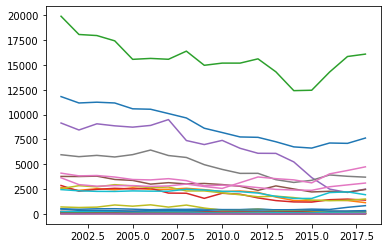

In [27]:
diff_list = []
absolute_value_diff_list =[]
for x in list(range(0,25)) :   
    theft_data = [len(data2001crime[x]),len(data2002crime[x]),len(data2003crime[x]),len(data2004crime[x]),len(data2005crime[x]),len(data2006crime[x]),len(data2007crime[x]),len(data2008crime[x]),len(data2009crime[x]),len(data2010crime[x]),len(data2011crime[x]),len(data2012crime[x]),len(data2013crime[x]),len(data2014crime[x]),len(data2015crime[x]),len(data2016crime[x]),len(data2017crime[x]),len(data2018crime[x])]
    plt.plot(list(range(2001,2019)), theft_data)
    a = len(data2001crime[x])
    b = len(data2018crime[x])
    c = b-a
    d = 100 * c / a
    f = math.sqrt(d**2)
    absolute_value_diff_list.append(f)
    diff_list.append(f"{d}%")
    
    
    
    
    
    

In [40]:
absolute_value_diff_list
data2002crime[13].head()

,ID,Year,Primary Type,Latitude,Longitude,Location,Date,Location Description
5767,2437381,2002,OFFENSE INVOLVING CHILDREN,41.689875,-87.622231,"(41.689875159, -87.62223072)",10/23/2002 10:00,"SCHOOL, PUBLIC, BUILDING"
6008,2102462,2002,OFFENSE INVOLVING CHILDREN,41.690779,-87.622356,"(41.690778821, -87.622356236)",4/26/2002 16:40,STREET
6015,2242563,2002,OFFENSE INVOLVING CHILDREN,41.690779,-87.622356,"(41.690778821, -87.622356236)",5/23/2002 0:00,APARTMENT
7398,2180391,2002,OFFENSE INVOLVING CHILDREN,41.685332,-87.622043,"(41.685332125, -87.622042783)",6/11/2002 12:30,"SCHOOL, PUBLIC, BUILDING"
14878,2157115,2002,OFFENSE INVOLVING CHILDREN,41.791057,-87.623427,"(41.791056977, -87.623427403)",5/29/2002 12:12,STREET


In [36]:
diff_list

max_offender = "INTERFERENCE WITH PUBLIC OFFICER"
max_percent = diff_list[12]

min_offender = "PROSTITUTION"
min_percent = diff_list[18]

min_change_offender = "OFFENSE INVOLVING CHILDREN"
min_change_percent = diff_list[13]

In [39]:
diff_list[13]


'-9.236947791164658%'

In [30]:
for x in 

SyntaxError: invalid syntax (<ipython-input-30-c08f46775a73>, line 1)

In [ ]:
math.sqrt((-4)**2)

In [ ]:
a=5
b=5

In [ ]:
len(data2018)

In [ ]:
len(data2019)

In [ ]:
locations = data2019[['Latitude', 'Longitude']]